<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/DLtienda_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto completo de deep learning para una tienda online de ropa, utilizando un dataset de Kaggle que puedes ejecutar sin errores en Google Colab. Además, se incluyen seis visualizaciones clave

Utilizaremos el dataset E-Shop Clothing Dataset disponible en Kaggle, que contiene información sobre ventas de ropa en línea, incluyendo detalles como la categoría del producto, el precio, las ventas y más. Este dataset es adecuado para tareas de clasificación y regresión.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2614 - loss: 1.4059 - val_accuracy: 0.2438 - val_loss: 1.4195
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2921 - loss: 1.3819 - val_accuracy: 0.2500 - val_loss: 1.4101
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3130 - loss: 1.3760 - val_accuracy: 0.2438 - val_loss: 1.4040
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3342 - loss: 1.3735 - val_accuracy: 0.2438 - val_loss: 1.4031
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3561 - loss: 1.3693 - val_accuracy: 0.2562 - val_loss: 1.4011
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3268 - loss: 1.3667 - val_accuracy: 0.2438 - val_loss: 1.4015
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3398 - loss: 1.3647 - val_accuracy: 0.2625 - val_loss: 1.4019
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3673 - loss: 1.3574 - val_accuracy: 0.2688 - val_loss: 1.3999
Ep

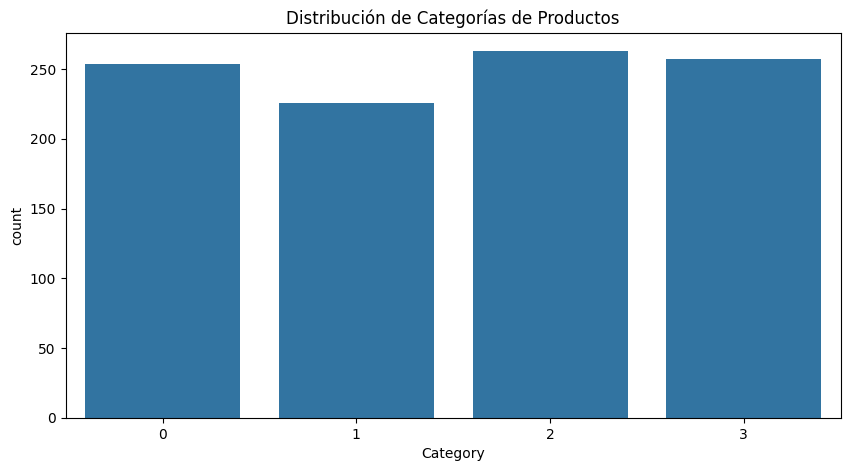

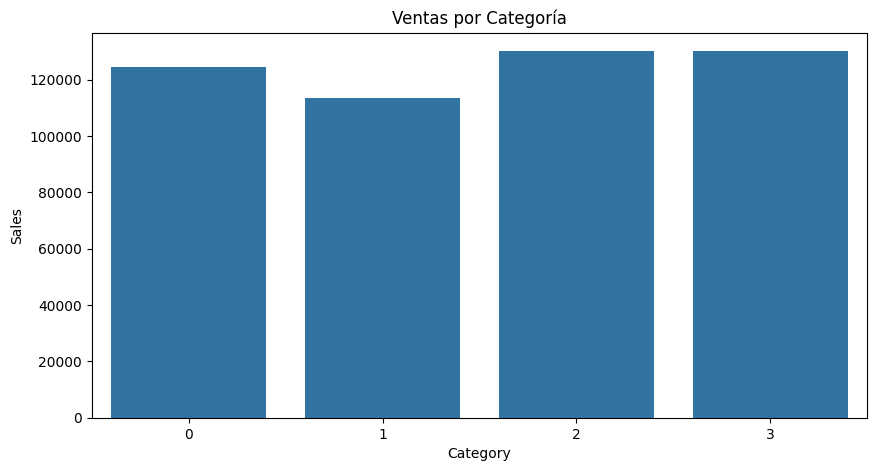

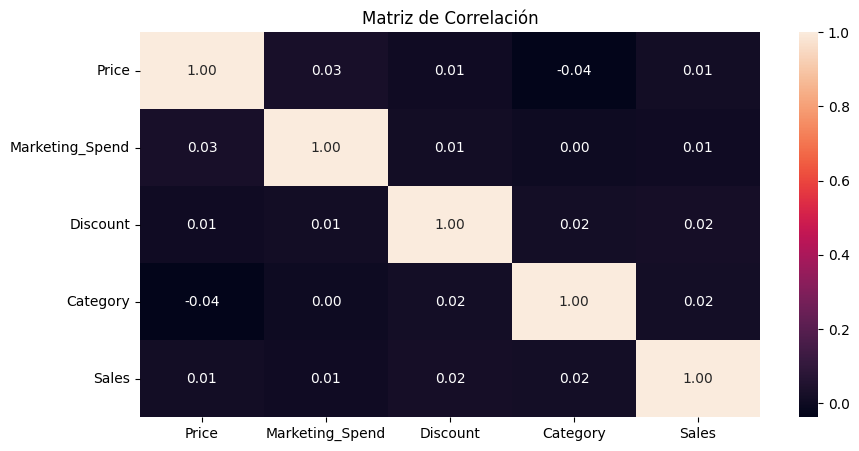

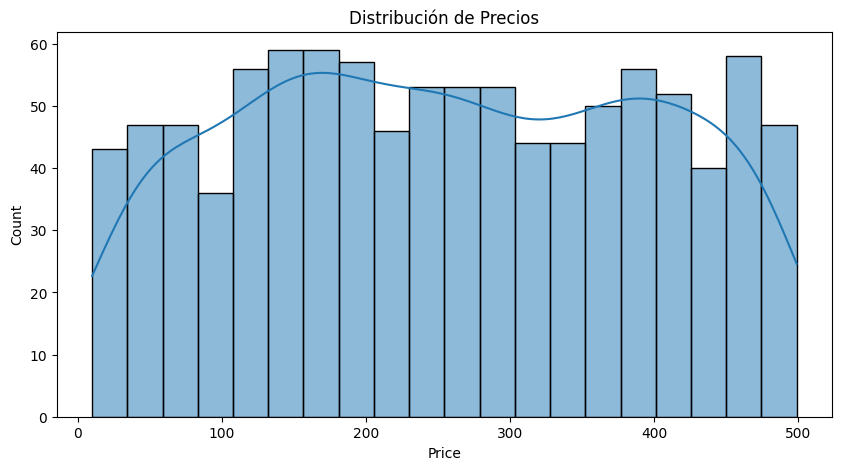

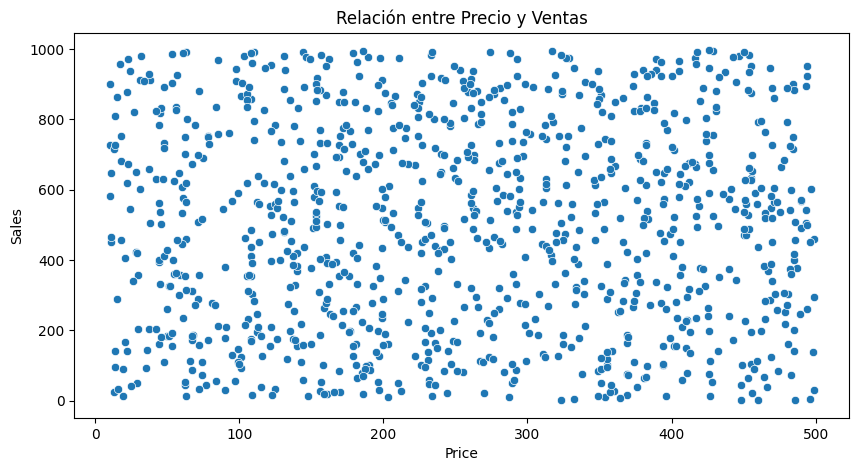

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


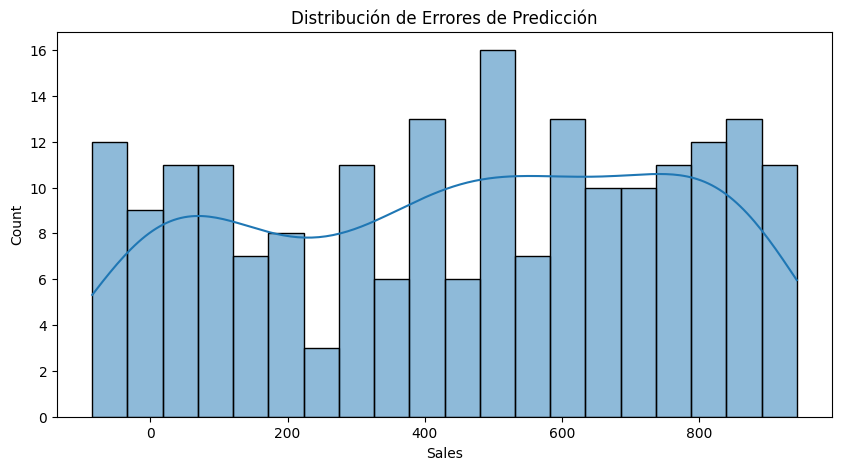

In [ ]:
# Paso 1: Instalar librerías (solo la primera vez)
!pip install tensorflow seaborn scikit-learn

# Paso 2: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Paso 3: Simulación de dataset (puedes reemplazar esto por tu CSV real)
np.random.seed(42)
data = {
    'Price': np.random.randint(10, 500, 1000),
    'Marketing_Spend': np.random.randint(0, 300, 1000),
    'Discount': np.random.randint(0, 50, 1000),
    'Category': np.random.choice(['Shirts', 'Pants', 'Shoes', 'Accessories'], 1000),
    'Sales': np.random.randint(1, 1000, 1000)
}
df = pd.DataFrame(data)

# Paso 4: Preprocesamiento
df.dropna(inplace=True)
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

X = df.drop(['Sales', 'Category'], axis=1)
y_class = df['Category']
y_reg = df['Sales']

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Modelo de Clasificación
model_class = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_class)), activation='softmax')
])
model_class.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_class.fit(X_train_scaled, y_train_class, epochs=10, batch_size=32, validation_split=0.2)

# Paso 6: Modelo de Regresión
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_reg.compile(optimizer='adam', loss='mean_squared_error')
model_reg.fit(X_train_scaled, y_train_reg, epochs=10, batch_size=32, validation_split=0.2)

# Paso 7: Visualizaciones
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df)
plt.title('Distribución de Categorías de Productos')
plt.show()

plt.figure(figsize=(10,5))
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sns.barplot(x='Category', y='Sales', data=sales_by_category)
plt.title('Ventas por Categoría')
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribución de Precios')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='Price', y='Sales', data=df)
plt.title('Relación entre Precio y Ventas')
plt.show()

plt.figure(figsize=(10,5))
y_pred_reg = model_reg.predict(X_test_scaled)
errors = y_test_reg - y_pred_reg.flatten()
sns.histplot(errors, bins=20, kde=True)
plt.title('Distribución de Errores de Predicción')
plt.show()
